<a href="https://colab.research.google.com/github/Kiwihead15/micrograd_from_scratch/blob/main/1_micrograd_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Define a sample function:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
# apply function f to 3.0
f(3.0)

20.0

In [ ]:
# apply function f to array xs
xs = np.arange(-5,5,0.25)
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

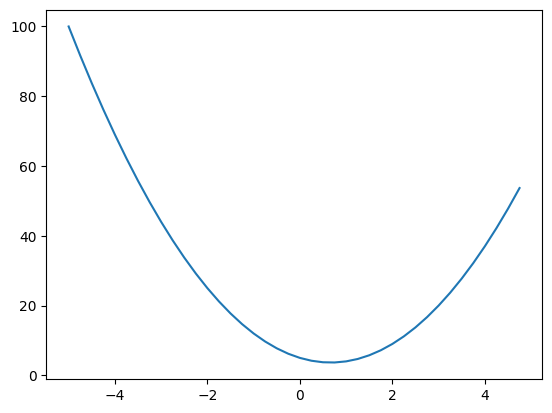

In [ ]:
# plot the function f for xs
plt.plot(xs,ys)

In [ ]:
# Derivative of f

h = 0.000001
x = 3.0
(f(x+h)-f(x))/h

14.000003002223593

In [ ]:
h = 0.000001
x = -3.0
(f(x+h)-f(x))/h

-21.999997002808414

In [ ]:
h = 0.000001
x = 2/3
(f(x+h)-f(x))/h

2.999378523327323e-06

In [ ]:
# les get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)



4.0


In [ ]:
# increment
h = 0.001

# inputs
a = 2.0
b = -3.0
c = 10.0

# We will try to evaluate de derivative of a, b and c on point (a=2,b=-3,c=10)

# work increasing a by h
d1 = a*b + c
a+=h
d2 = a*b + c

print(d1)
print(d2)
print("slope", (d2-d1)/h)


4.0
3.997
slope -3.0000000000001137


In [ ]:
# now, work increasing b by h
d1 = a*b + c
b+=h
d2 = a*b + c

print(d1)
print(d2)
print("slope", (d2-d1)/h)

3.997
3.999001
slope 2.0009999999999195


In [ ]:
# now, work increasing c by h
d1 = a*b + c
c+=h
d2 = a*b + c

print(d1)
print(d2)
print("slope", (d2-d1)/h)

3.999001
4.000000999999999
slope 0.9999999999994458


In [ ]:
# let build a value function

class Value:

    def __init__(self, data):
        self.data =  data

    def __repr__(self):
        return f"Value(data={self.data})"

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0
a + b

# This operation a+b will through out an error because the class doesn't know how to sum up these objects or instances

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [ ]:
# let's define the add operation for the class Value

class Value:

    def __init__(self, data):
        self.data =  data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0
a + b

Value(data=-1.0)

In [ ]:
# lets define the multiplication operation for the class Value

class Value:

    def __init__(self, data):
        self.data =  data

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0
c = Value(10.0)  # This is an instance of class Value with data = -3.0
d = a*b + c
d

Value(data=4.0)

In [ ]:
# Now let´s add a value called children to keep the previous results, the values from the result comes

class Value:

    def __init__(self, data, _children = ()):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other)) # Here when the instance is created the parameter "_children" takes the value of parameter "other"
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other)) # Here when the instance is created the parameter "_children" takes the value of parameter "other"
        return out

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0
c = Value(10.0)  # This is an instance of class Value with data = -3.0
d = a*b + c
d


Value(data=4.0)

In [ ]:
d._prev  # calling the _prev
# Here below we see the previous values from where the result come from

{Value(data=-6.0), Value(data=10.0)}

In [ ]:
# now we know the values from the result comes, but we don´t know the operation applied to these values to get the result, let add it:

class Value:

    def __init__(self, data, _children = (), _op = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op


    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'
        return out

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0
c = Value(10.0)  # This is an instance of class Value with data = -3.0
d = a*b + c
d


Value(data=4.0)

In [ ]:
d._prev # calling the _prev
# Here below we see the previous values from where the result come from

{Value(data=-6.0), Value(data=10.0)}

In [ ]:
d._op  # calling the _op
# Here below we see the previous operation used to get the result

'+'

Now up here 👆 we have already the full Value class that allows to get the result of sum or multiplication operations, the previous values, and the operation applied.

In [ ]:
# let's add labels to values for visualization purposes

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label


    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'
        return out

a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
e = a * b; e.label = "e"
d = e + c; d.label = "d"
L = d * f; L.label = "L"
L

Value(data=-8.0)

In [ ]:
# We will add the gradient

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'
        return out

a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
e = a * b; e.label = "e"
d = e + c; d.label = "d"
L = d * f; L.label = "L"
L


Value(data=-8.0)

In [ ]:
# This block of code draws the Value object for visualization

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

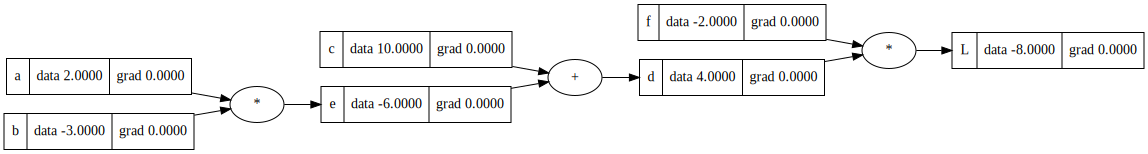

In [ ]:
draw_dot(L)

In [ ]:
# let´s calculate the gradients for each variable manualy:

# this function allow us to use the global variables locally without mess up theirs global values

# This is how manualy calculate de derivative of L respect to L:

def lol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data + h               # Add h to L

    print((L2-L1)/h)
    return (L2-L1)/h

L.grad = lol()
# Of course the derivative of L respect to himself is 1

1.000000000000334


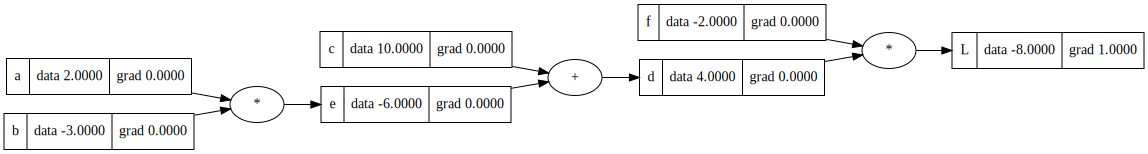

In [ ]:
draw_dot(L)

In [ ]:
# This is how manualy calculate de derivative of f respect to L: df/dL

def fol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0 + h, label = 'f')  # This is an instance of class Value with data = -2.0 + h
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

f.grad = fol()
# Then the derivative of f respect to L is:

3.9999999999995595


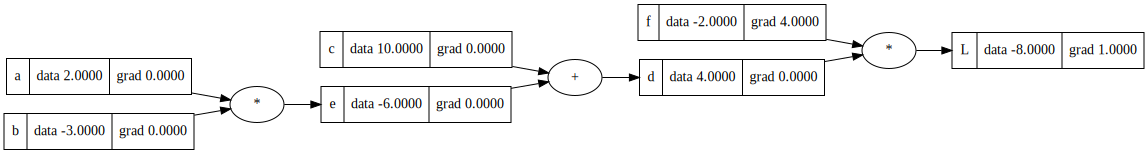

In [ ]:
draw_dot(L)

In [ ]:
# This is how manualy calculate de derivative of d respect to L:  dd/dl

def dol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    d.data += h                   # add h to d
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

d.grad = dol()
# Then the derivative of d respect to L is:

-2.000000000000668


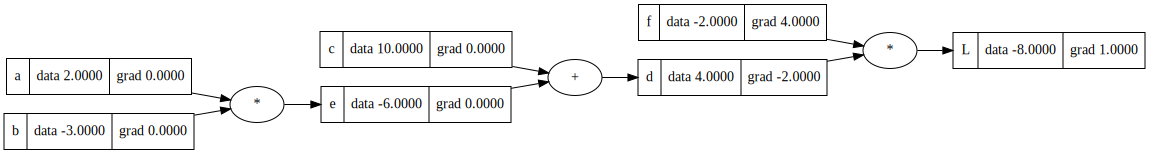

In [ ]:
draw_dot(L)

In [ ]:
# This is how manualy calculate de derivative of c respect to L:

def col():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0 + h, label = "c")  # This is an instance of class Value with data = -3.0 + h
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

c.grad = col()
# Then the derivative of d respect to L is:

-1.9999999999988916


This 👆 makes sense because the derivative of c respect to d in a sum (c + f = d) is 1.

"d" will change the same amount as change "c"

    dc/dd = 1
therefore:

    dc/dL = dc/dd * dd/dL

    dc/dL = 1 * dd/dL

    dc/dL = dd/dL
and, since in this example:

    dd/dL = -2
, then:

    dc/dL = -2

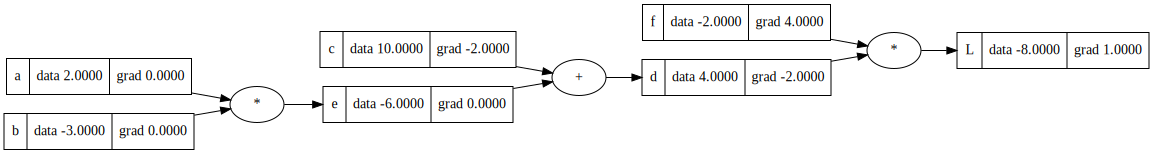

In [ ]:
draw_dot(L)

In [ ]:
# This is how manualy calculate de derivative of e respect to L:  de/dL = de/dd * dd/dl

def eol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    e.data += h                     # Add h to e
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

e.grad = eol()
# Then the derivative of e respect to L is:

-2.000000000000668


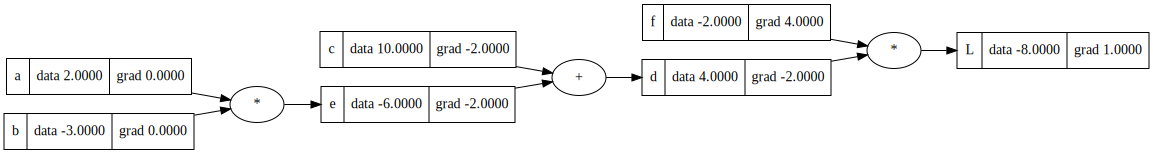

In [ ]:
draw_dot(L)

In [ ]:
# This is how manualy calculate de derivative of a respect to L:  da/dL

def aol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0 + h, label = "a")   # This is an instance of class Value with data = 2.0 + h
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

a.grad = aol()
# Then the derivative of a respect to L is:

6.000000000000227



This 👆 makes sense because:

    da/dL = da/de * de/dL

from before in this we know that:

    dL/de = -2

we also now that da/de in (a*b = e) is b,

    da/de = b = -3 (in this example)

then,

    da/dL = -3 * -2 = 6

the same applies to db/dL so,

    db/DL = 2 * -2 = -4



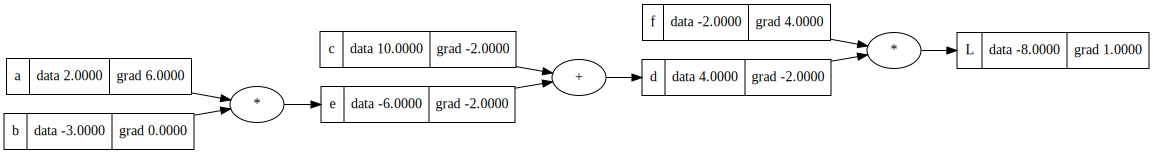

In [ ]:
draw_dot(L)

In [ ]:
# This is how manualy calculate de derivative of b respect to L:  da/dL

def bol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0 + h, label = "b")  # This is an instance of class Value with data = -3.0 + h
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

b.grad = bol()
# Then the derivative of b respect to L is:

-3.9999999999995595


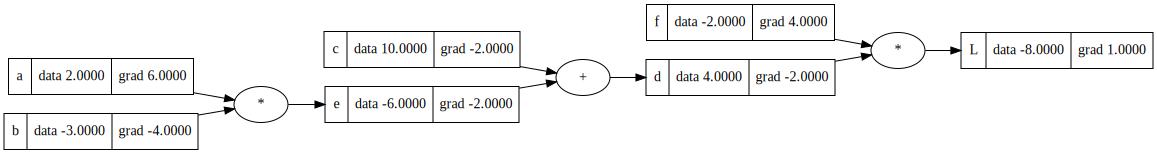

In [ ]:
draw_dot(L)

We have back propagated the function, and we know how much our variables affect the result.
Let´s increase our variables a bit to check how much the result varies:  

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad
e = a * b
d = e + c
L = d * f
print (L)

Value(data=-7.286496000000042)




[Neuron representation](https://www.google.com/url?sa=i&url=https%3A%2F%2Fcs231n.github.io%2Fneural-networks-1%2F&psig=AOvVaw04JESRoTPujHs_o9Ow8ipe&ust=1708252497328000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCMjA5MyWsoQDFQAAAAAdAAAAABAE)

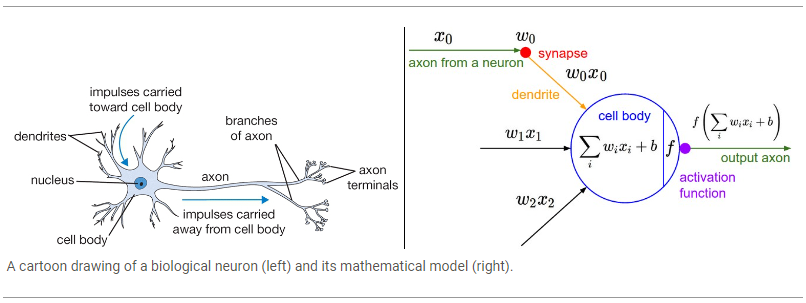



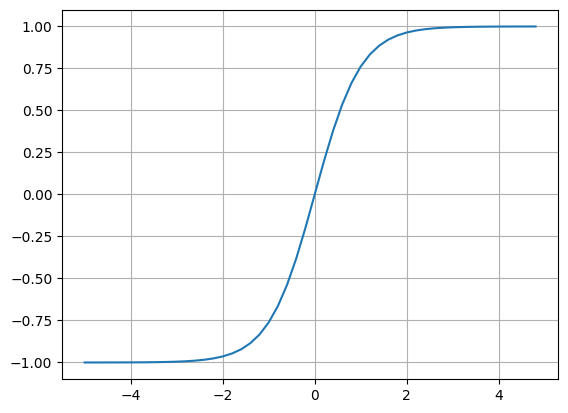

In [ ]:
# Activation function sample (tanh, sigmund)

plt.plot(np.arange(-5,5,.2), np.tanh(np.arange(-5,5,.2))); plt.grid()  # tanh function as sample



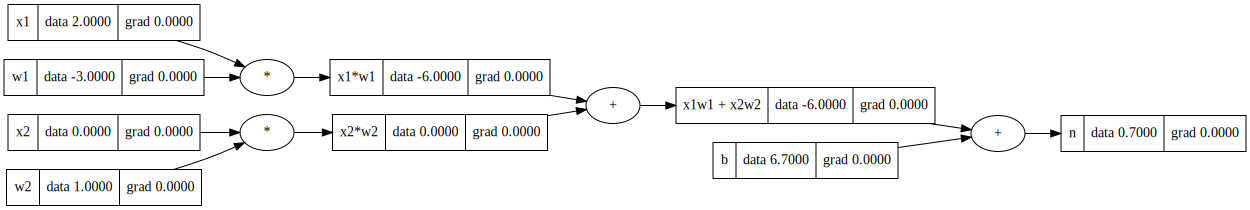

In [ ]:
# Let´s make a neuron calculation:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.7, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"


draw_dot(n)

Before to apply the activation function, we need to create is in the class Value. In this case we will use tanh.

In [ ]:
# We will add the activation function tanh()

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')
        return out

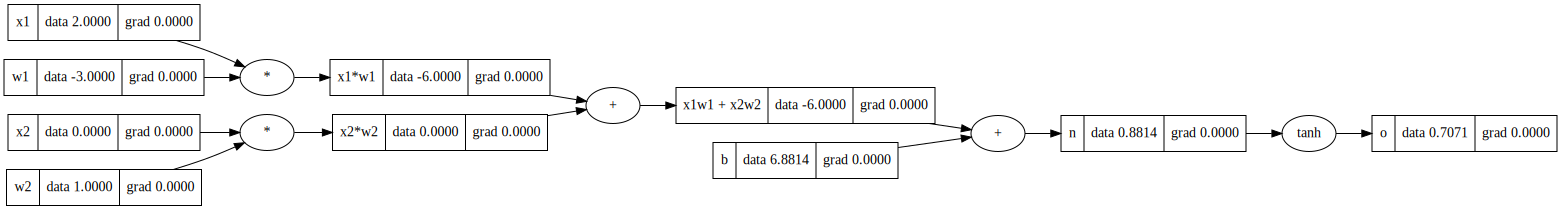

In [ ]:
# Let´s make a neuron calculation with the activation function:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.8813735870195432, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"


draw_dot(o)

Let´s calculate the gradients as we did above:


In [ ]:
# we already know that:
o.grad = 1.0

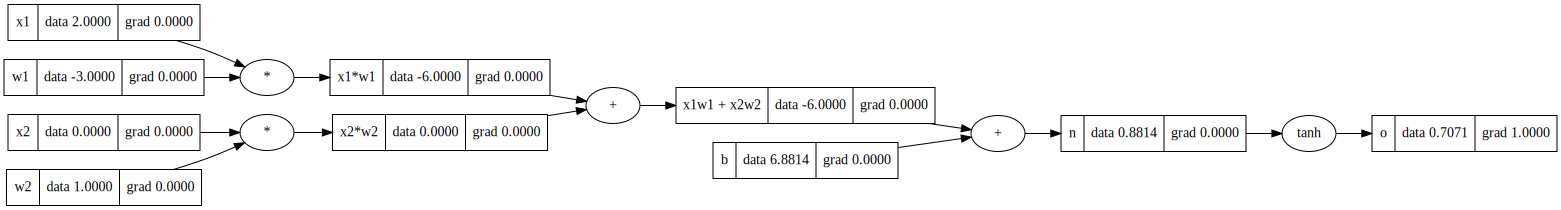

In [ ]:
draw_dot(o)

# the derivative of tanh() function is in this case:

    o = tanh(n)
    do/dn = 1 - o**2  

In [ ]:
# Then the derivative of o in n is:
n.grad = 1 - o.data**2
n.grad



0.4999999999999999

In [ ]:
# we also know that + operation in x1w1*x2w2 + o distributes the previous gradient, then the derivative of x1w1x2w2 on n is:

x1w1x2w2.grad = n.grad
b.grad = n.grad

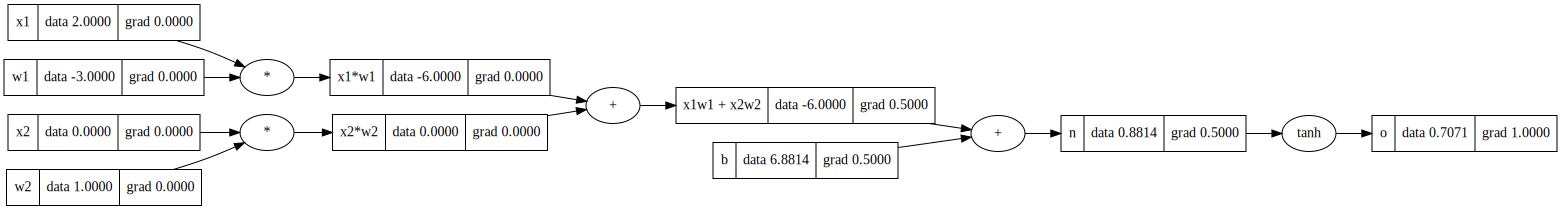

In [ ]:
draw_dot(o)

In [ ]:
# the same way before, the following + operation in x1*w1 + x2*w2 will distribuite the previous gradient:

x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad


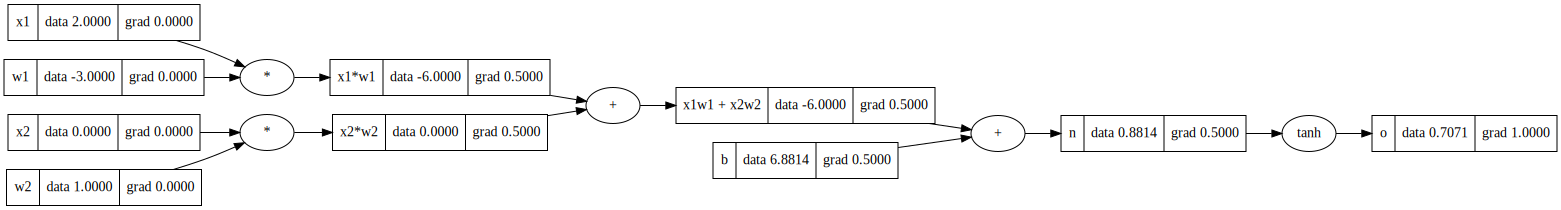

In [ ]:
draw_dot(o)

In [ ]:
# Let's calculate the x1, x2 , w1 and w2 gradients as we did before.
# As the operation is a * , the gradients will be:

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

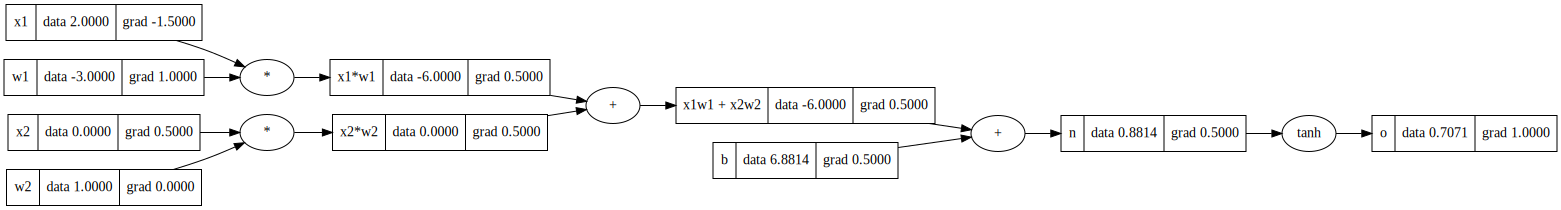

In [ ]:
draw_dot(o)

According this example 👆 we can see that w2 weight (neuron 2) will not affect the result, and w1 (neuron 1) will affect the result in the same proportion  

# Backpropagation running with topological manual sort sequence.

Reset the notebook to set all the gradients to zero.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# let's add to the class Value a backpropagation function

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

In [ ]:
#This block of code draws the Value object for visualization

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

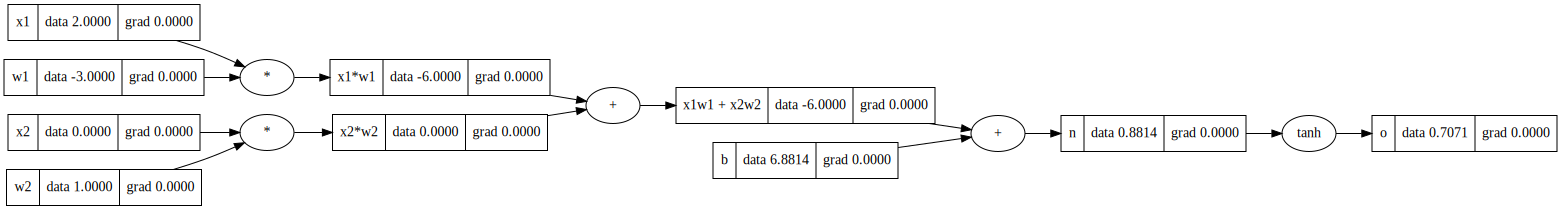

In [ ]:
# Let´s set a neuron:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.8813735870195432, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"


draw_dot(o)

In [ ]:
# as base case, we need to initialize o.grad to 1, because otherwise will take the default value in __init__ -> o.grad= Zero
o.grad = 1

In [ ]:
# This will calculate the n.grad automatically by backpropagating
o._backward()

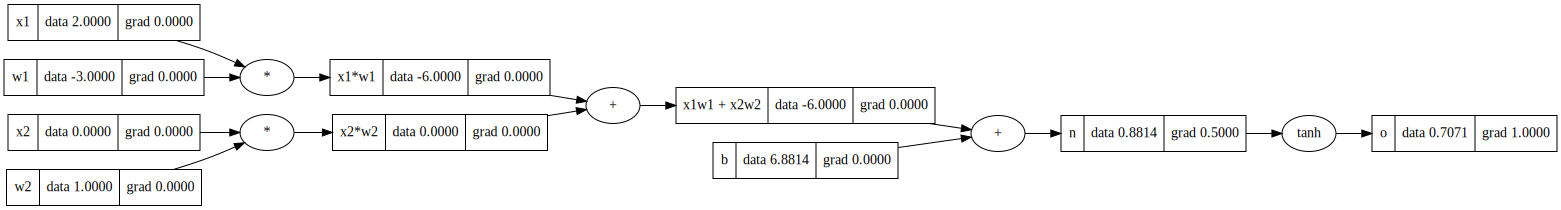

In [ ]:
draw_dot(o)

In [ ]:
# This will calculate the rest of .grad automatically
n._backward()
b._backward()   # This backpropagation in "b" doesn't do anything, because it hasn´t child so _backward() = None
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

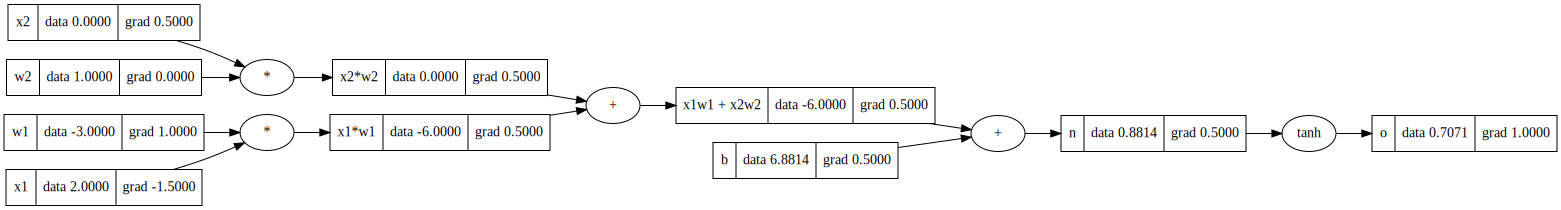

In [ ]:
draw_dot(o)

## Backpropagation running with topological sort sequence.

The order of processing each node is important, because before go backward, the algorithm must go forward, and when it does backpropagation must do it in strict order.

### This is topological sort:

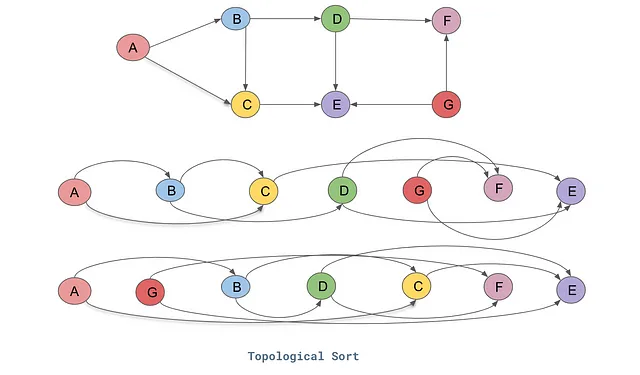

Let's define a secuence of code that make a topological order list of nodes for the network:

This code will start with the last node, it will visit its children, and finally it add itself to the topo list.

During the process, each time a child is visited, it will play the same process, then the topo list will be populated for the previous nodes and its children before ending with the father.

In [ ]:
topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
visited = set()                 # set of already visited nodes by the algorithm
def build_topo(v):              # function to populate topo list in topological sort
    if v not in visited:        # if "v" is not in visited set:
        visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
        for child in v._prev:   # iterates over its childrens
            build_topo(child)   # apply the same function to each child
        topo.append(v)          # once all its children and grand...children were processed, add "v" to the topo list.



In [ ]:
# Let's apply the above code to our neuron

build_topo(o)         # apply build_topo(v) starting in "o"
for node in topo:     # iterates over nodes on topo list in reverse order
    print (node.label, f' = {node.data}')
# This below is the topo list of our network sample:

w2  = 1.0
x2  = 0.0
x2*w2  = 0.0
x1  = 2.0
w1  = -3.0
x1*w1  = -6.0
x1w1 + x2w2  = -6.0
b  = 6.881373587019543
n  = 0.8813735870195432
o  = 0.7071067811865476


In [ ]:
# Now lets apply the _backward function to the nodes in the list. It will start in "o" (the father)

o.grad = 1    # We will set o.grad = 1, otherwise it would take the __init__ value that is zero.

for node in reversed(topo):     # iterates over nodes on topo list in reverse order
    print (node.label)
    node._backward()            # apply _backward function to each node to find the node.grad of each child

o
n
b
x1w1 + x2w2
x1*w1
w1
x1
x2*w2
x2
w2


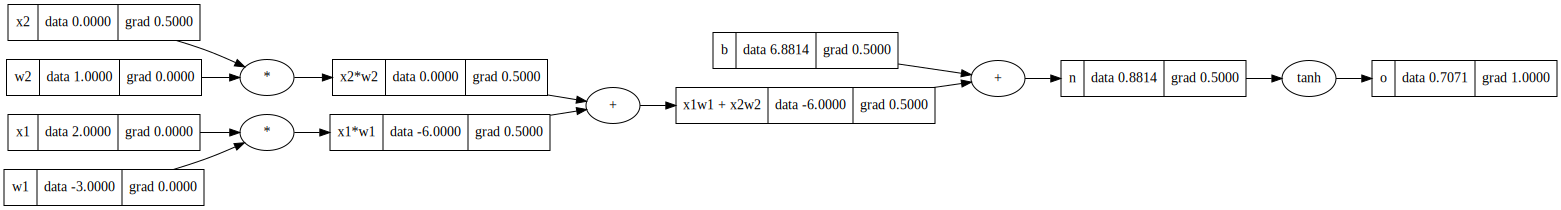

In [ ]:
draw_dot(o)

Lets incorpotate the backward function with the topografic sort into the Value class

In [ ]:
# let's add to the class Value a backpropagation function

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()



In [5]:
#This block of code draws the Value object for visualization

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

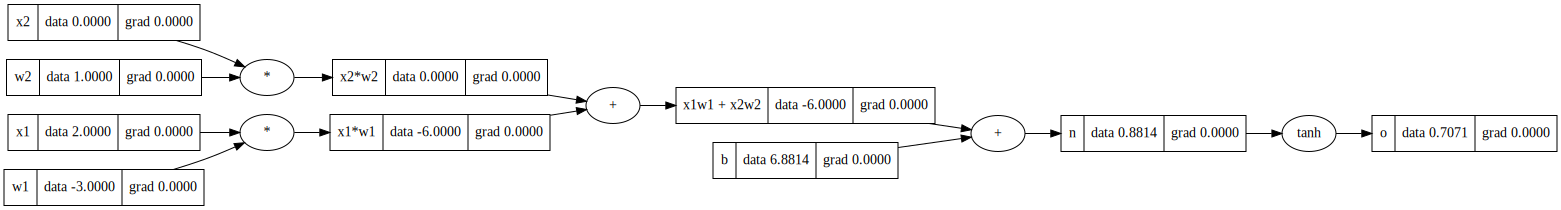

In [ ]:
# Let´s set a neuron:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.8813735870195432, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"


draw_dot(o)

In [ ]:
o.backward()

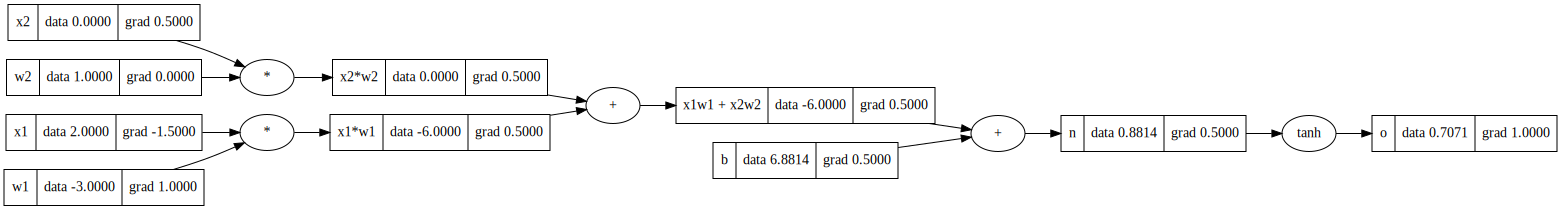

In [ ]:
draw_dot(o)

Problems with this Value class if variables are used more than one time:

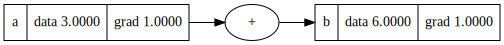

In [ ]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'

b.backward()

draw_dot(b)

Here above 👆 the a.grad should be 2, but it is shown 1.

In this case below 👇 the a and b gradients are wrong.

This is because the gradient is define each time a variable is used, when a variable is uned more than one time the gradient is overwriten, when it should be sum to the previous one.

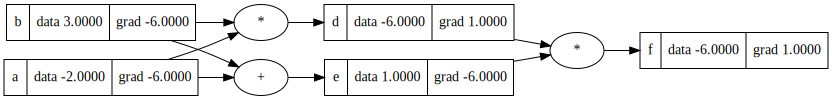

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [ ]:
# let's modify this into the class Value a backpropagation function

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

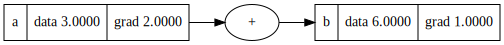

In [ ]:
# Now lets try the exercise again:

a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'

b.backward()

draw_dot(b)


Now, here above 👆 the a.grad should be 2, and it is shown 2. then is OK

In this case below 👇 the a and b gradients are now OK.

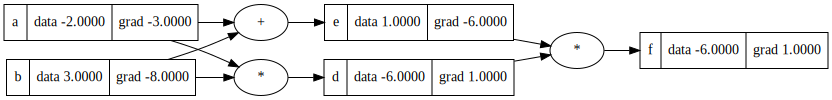

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

Let's add more operations to the Value class

In [ ]:
a = Value(2.8)
a + 1

# This will rise an error because 1 is not a Value class object or instance.
# We need to define in the class what to do with numbers

AttributeError: 'int' object has no attribute 'data'

In [ ]:
# The same happens with the "*"
a = Value(2.8)
a * 2


AttributeError: 'int' object has no attribute 'data'

In [ ]:
# let's solve these problems into the class Value a backpropagation function

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

In [ ]:
# now let's check again the "+" operation:

a = Value(2.8)
a + 1


Value(data=3.8)

In [ ]:
# now let's check again the "*" operation:
a = Value(2.8)
a * 2

Value(data=5.6)

In [ ]:
# Although "*" seems to work, if the expression is this:

2 * a

# It rises an error, because Python does :

#   a*2
#   a.__mul__Value(2)   # this works

#   2 * a
#   2.__mul__Value(a)    # this doesn't work

TypeError: unsupported operand type(s) for *: 'int' and 'Value'

In [ ]:
# to solve this we add to the Value class a function that tries the operation, and if don't works, it swaps the operands
# this function is called __rmul__()

# def __rmul__(self, other): # other * self
#    return self*other

# the same way, we add __radd__ to swap operands in a sum between a number and a value object
# def __radd__(self, other):  # other + self
#        return self + other


In [ ]:
# let's add it to the class Value:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __rmul__(self, other):  # other * self
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()


In [ ]:
# Let try the sample

a = Value(2.8)
2 * a

Value(data=5.6)

In [ ]:
# let's add the exponentation to the class Value:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __rmul__(self, other):  # other * self
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad += out.data * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()


In [ ]:
a = Value(2.8)
a.exp()

Value(data=16.444646771097048)

In [ ]:
# let try to check if value class works with divition:

a = Value(2.8)
b = Value(2)
a/b

# This rise an error because divition is not included in the class Value

TypeError: unsupported operand type(s) for /: 'Value' and 'Value'

instead of use division operation, we will consider a wider operation:

"a / b" can be expressed as "a * (1/b)" and, "a * (b**-1)"

We will built a function for b**k , where if k = -1 , it is a division.

In [ ]:
# let's add the divition to the class Value:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only works for power of  integer or float"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __rmul__(self, other):  # other * self
        return self * other

    def __truediv__(self, other):   # self / other
        return self * other**-1

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad += out.data * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

In [ ]:
# Now division works
a = Value(2)
b = Value(4)
a / b

Value(data=0.5)

In [4]:
# let's add the substraction and negative to the class Value:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only works for power of  integer or float"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __rmul__(self, other):  # other * self
        return self * other

    def __truediv__(self, other):   # self / other
        return self * other**-1

    def __neg__(self):      # -self
        return self * -1

    def __sub__(self, other):  # self - other
        return self + (-other)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad += out.data * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

In [ ]:
# let's try a substration with negative numbers

a = Value(4)
b = Value(-6)

a-b


Value(data=10)

Now let's replace the tanh function by it equivalent:

    tanh (x) = e**2x - 1 / e**2x + 1

In [ ]:
# Let´s set a neuron:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.8813735870195432, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"
# ---------------------------
# o = n.tanh(); o.label = "o"
#----------------------------
e = (2*n).exp()
o = (e - 1) / (e + 1)
o.label = "o"
o.backward()

draw_dot(o)

NameError: name 'draw_dot' is not defined

## Backpropagation using Pytorch library

Let´s build the same neuron with pytorch: comparison

the equivalent code to our neuron definition is:

In [3]:
import torch

In [ ]:
# neuron inputs:
x1 = torch.Tensor([2.0]).double() # torch works with tensors, and it has to be double precission to match Python default dtype
x1.requires_grad = True         # set to get the gradiant
x2 = torch.Tensor([0.0]).double()
x2.requires_grad = True

# neuron weight:
w1 = torch.Tensor([-3.0]).double()
w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()
w2.requires_grad = True

# neuron bias:
b = torch.Tensor([6.8813735870195432]).double()
b.requires_grad = True

# x1*w1 + x2*w2 + b
n = (x1 * w1 + x2 * w2) + b

# activation function:
o = torch.tanh(n)

print(o.data.item())    # the item() takes-out the tensor and returns just the value
o.backward()            # calls the backpropagation function

print("------------")
print("x1   ", x1.grad.item())
print("x2   ", x2.grad.item())
print("w1   ", w1.grad.item())
print("w2   ", w2.grad.item())
print("b    ", b.grad.item())


0.7071066904050358
------------
x1    -1.5000003851533106
x2    0.5000001283844369
w1    1.0000002567688737
w2    0.0
b     0.5000001283844369


In [ ]:
# here an explanation because we need to set dtype for tensor as double float precisson:

# by default pytorch works with dtype simple for tensors
x1 = torch.tensor([-3.0])
print("x1 data type with default pytorch float precission -> ", x1.dtype)

# while python works by default
x2 = (1.0)
print ("x2 data type with default python float precission -> ", type(x2), " in python, float is 64 bits")

# then we need to set the dtype for tensors to double to uniform
x1 = torch.tensor([-3.0]).double()
print("x1 data type with double float precission -> ", x1.dtype)

x1 data type with default pytorch float precission ->  torch.float32
x2 data type with default python float precission ->  <class 'float'>  in python float is 64 bits
x1 data type with double float precission ->  torch.float64


In [ ]:
# we can call the object "o" to check its elements

o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [ ]:
o.item()

0.7071066904050358

In [ ]:
o.dtype

torch.float64

In [ ]:
o.grad_fn

## Neural nets

Building out a neural net library (multi-layer perceptron) in micrograd

In [2]:
import random

In [ ]:
# How does __call__ function works:

class Neuron:

    def __init__(self, nin):    # ini is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)] # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))         # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        return 0.0


In [ ]:
# this is how __call__ works:

x = [2.0,3.0]   # define the x tensor
n = Neuron(2)   # make an instannce of Neuron class with two inputs called n
n(x)            # when I call the n instance automatially execute the __call__()

# the return in this case would be 0.0

0.0

In [ ]:
class Neuron:

    def __init__(self, nin):    # ini is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)] # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))         # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b    # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

In [ ]:
# lets try it
x = [2.0,3.0]   # define the x tensor
n = Neuron(2)   # make an instance of Neuron class with two inputs called n
n(x)
# the forward propagation pass result is:

Value(data=-0.9331326231025906)

## building out a neural net library (multi-layer perceptron) in micrograd

In [ ]:
class Neuron:

    def __init__(self, nin):    # ini is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)] # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))         # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b    # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

# Let build the layer class to build layers with nin inputs and nout outputs:

class Layer:

    def __init__(self, nin, nout):   # nout is the number of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)]  # list a neurons

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]

        return outs

In [ ]:
# lets try to build a layer with 2 inputs and 3 outputs
x = [2.0,3.0]       # define the x tensor
n = Layer(2, 3)     # make an instance of Layer class with two inputs and 3 outputs called n
n(x)
# the forward propagation pass result is:

[Value(data=-0.4612552123002227),
 Value(data=0.9921289237235602),
 Value(data=-0.7896748549003227)]

In [1]:
class Neuron:

    def __init__(self, nin):    # ini is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)] # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))         # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b    # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

# Let's build the layer class to build layers with nin inputs and nout outputs:

class Layer:

    def __init__(self, nin, nout):   # nout is the number of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)]  # list a neurons

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]

        return outs[0] if len(outs) == 1 else outs

# Let's build a MLP (multi layer perceptron):

class MLP:

    def __init__(self, nin, nouts):  # nouts is a list of sizes of all the layers we want
        sz = [nin] + nouts          # we put all sizes together
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))] # we iterate over the list sizes in consecutive paires to apply Layer class

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x



### let's try to build this MLP (Multi-Layer Perceptron):
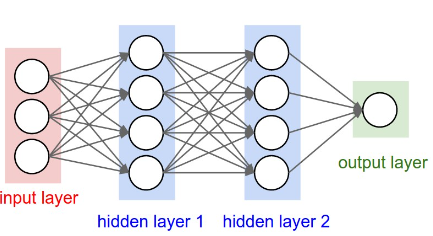

In [9]:
# the MLP has 3 inputs and 2 hidden layers of 4 neuros and 1 output.

x = [2.0, 3.0, -1.0]       # define the x tensor
n = MLP(3, [4, 4, 1])     # make an instance of MLP class with 3 inputs, 2 layers of 4 neurons and 1 output called n
n(x)

# the forward propagation pass result is:

Value(data=-0.46052365026297193)

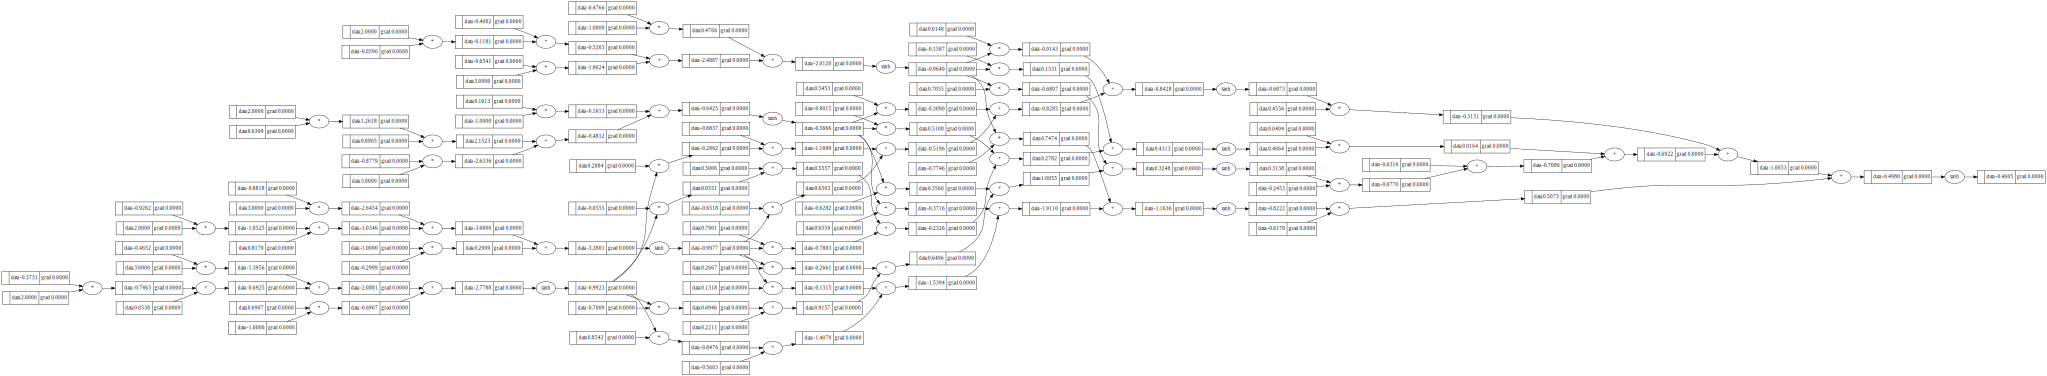

In [10]:
draw_dot(n(x))

## Creating a tiny dataset, writing the loss function

In [11]:
# inputs
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.5, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0 , 0]  # desired targets

# forward propagation:
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.46052365026297193),
 Value(data=-0.41119703091048526),
 Value(data=-0.6620787666401567),
 Value(data=-0.4600654422414822)]

The predictions 👆 are not too good.
In order to evaluate how good are the predictions, we use a function called loss, which returns just one number, the closest the loss is to zero, the better the predictions are.

In [13]:
# This the loss function
loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))
loss
# This is the value of loss function:

Value(data=2.805669240486392)

In [14]:
# Applying the backpropagation to this loss function, to get all the gradients

loss.backward()

In [17]:
# a specific gradient can be called by:

n.layers[0].neurons[0].w[0].grad

# In this case we are accessing to the gradient of the first input of the first neuron from the first layer of the MLP.

-0.7663223714134588

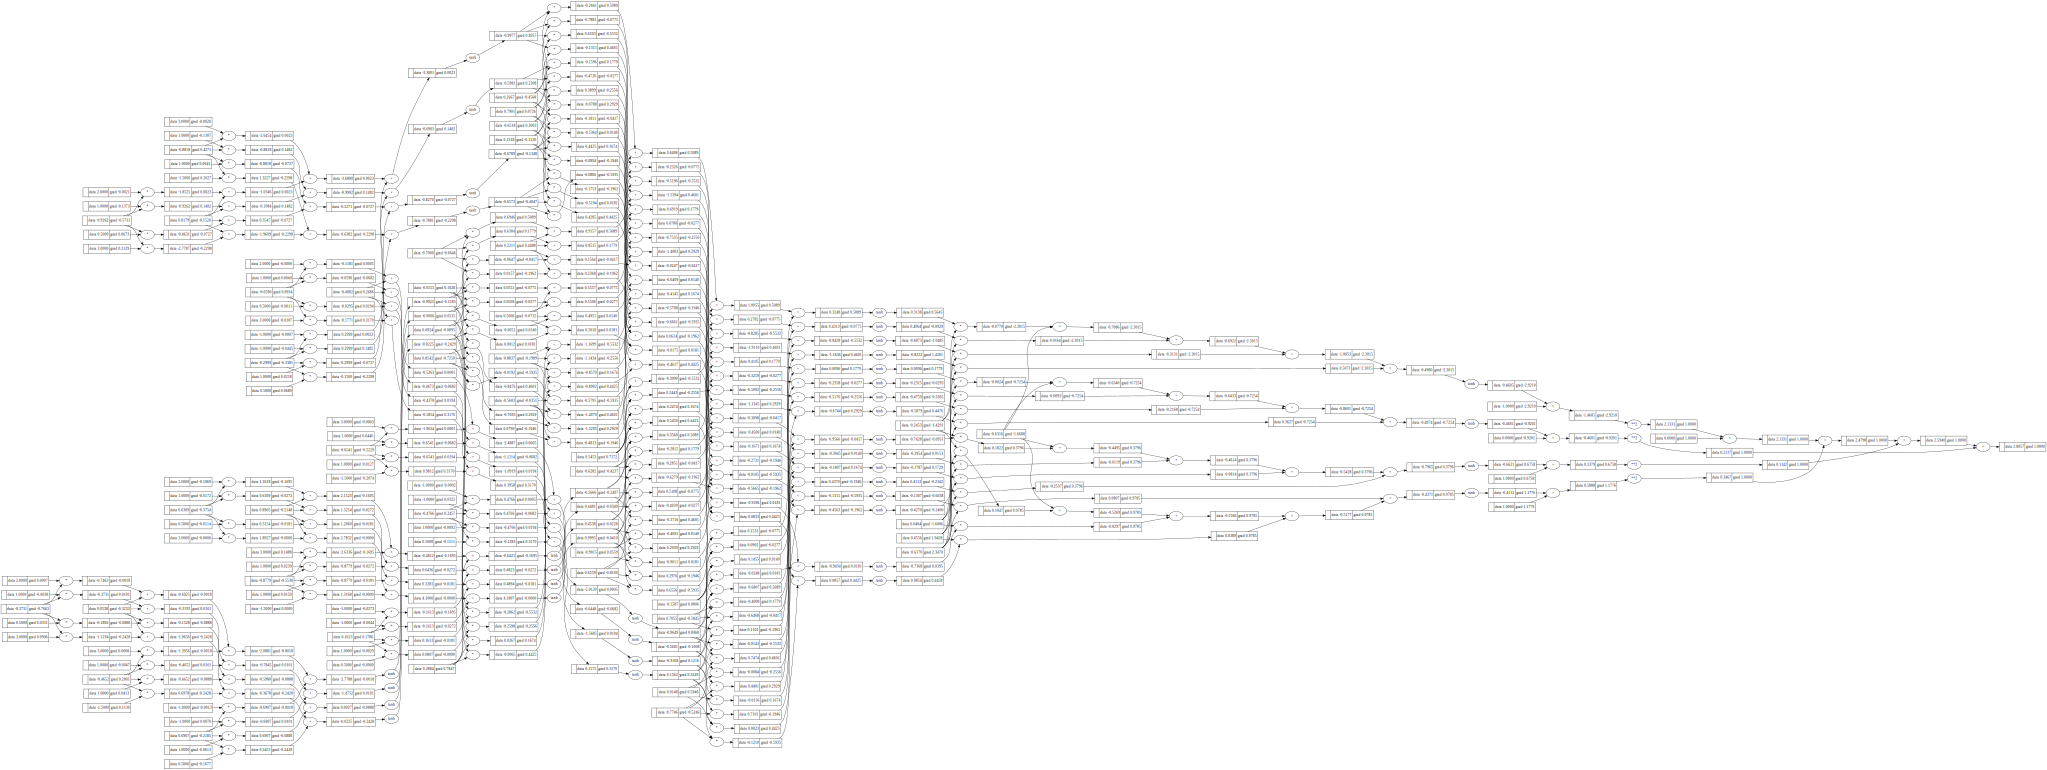

In [18]:
# we can draw the function loss:
draw_dot(loss)

For instance, if

    loss = Value(data=2.805669240486392)

we know that we have to reduce it value, then we need a negative gradiente to approch zero.

if

    n.layers[0].neurons[0].w[0].grad =  -0.7663223714134588

the gradient is negative, so its influence on the loss will be also negative.

thanks to backpropagation, we know all the gradients of every single neuron in the MLP.

Unfortunately, the inputs are fix, because they are given with the problem, we can't change them to improve the loss, but the weights and biases of neuros on the hidden layers can be modified.



In [ ]:
# Let's make a code to collect all the parameters of the NN in a way we can change them accordingly what we need.
# this code will be added to the Neuron class

In [44]:
class Neuron:

    def __init__(self, nin):    # ini is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)] # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))         # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b    # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

    def parameters(self):
        return self.w + [self.b]    # this will return a list of weights and the bias for the neuron

# Let's build the layer class to build layers with nin inputs and nout outputs:

class Layer:

    def __init__(self, nin, nout):   # nout is the number of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)]  # list a neurons

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]

        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]  # this will return a list of weights and the bias for the layer
    # This code above is equivalent the code below:
        # params = []
        # for neurons in self.neurons:
        #     ps = neurons.parameters()
        #     params.extend(ps)
        # return params

# Let's build a MLP (multi layer perceptron):

class MLP:

    def __init__(self, nin, nouts):  # nouts is a list of sizes of all the layers we want
        sz = [nin] + nouts          # we put all sizes together
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))] # we iterate over the list sizes in consecutive paires to apply Layer class

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]  # this will return a list of weights and the bias for the MLP

In [152]:
# lets build a MLP
# the MLP has 3 inputs and 2 hidden layers of 4 neuros and 1 output.

x = [2.0, 3.0, -1.0]       # define the x tensor
n = MLP(3, [4, 4, 1])     # make an instance of MLP class with 3 inputs, 2 layers of 4 neurons and 1 output called n
n(x)

# the forward propagation pass result is:

Value(data=0.9288333765139256)

In [46]:
n.parameters()   # These are the total parameters of the MLP

[Value(data=-0.04497585000537763),
 Value(data=-0.1800773131000819),
 Value(data=-0.595779347696954),
 Value(data=0.09656934610573376),
 Value(data=-0.25615750708632046),
 Value(data=-0.825414214307491),
 Value(data=0.8549310673932118),
 Value(data=-0.3640595737231864),
 Value(data=0.06545218804902908),
 Value(data=0.7929400028037354),
 Value(data=-0.4087884662444057),
 Value(data=-0.7083003312377103),
 Value(data=-0.5008181273495855),
 Value(data=-0.5655052996083869),
 Value(data=0.4296879134762923),
 Value(data=0.4795176944824755),
 Value(data=-0.6240353729244501),
 Value(data=0.9237523193960615),
 Value(data=-0.7253078223622718),
 Value(data=-0.9126812892261718),
 Value(data=0.05833583574530432),
 Value(data=-0.24183387827844172),
 Value(data=0.17063406031390338),
 Value(data=-0.41597877682129814),
 Value(data=0.8609782758766249),
 Value(data=-0.8983408400433355),
 Value(data=-0.6869990783092177),
 Value(data=-0.15643666342625262),
 Value(data=0.2375502629183086),
 Value(data=0.1286

In [47]:
len(n.parameters())   # These are the total number of parameters in the MLP

41

In [48]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.5, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0 , 0]  # desired targets

# forward propagation:
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9075827214802309),
 Value(data=0.2397180149427209),
 Value(data=0.7634594085492981),
 Value(data=0.8756388033354182)]

In [49]:
# This the loss function
loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))
loss
# This is the value of loss function:

Value(data=5.421974109450245)

In [55]:
loss.backward()

In [57]:
n.layers[0].neurons[0].w[0].grad   # this is the gradiant of this input

0.18239487728828735

In [58]:
n.layers[0].neurons[0].w[0].data   # this is the value of this input

-0.04497585000537763

In [138]:
# now we will change the data for all the neurons in the MLP

for p in n.parameters():     # for all the parameters
    p.data += -0.01 * p.grad  # will change the data slightly in a oposite (negative) direction of the gradient. Because we want the loss decrece.


In [60]:
# now the data of this neuron should have change a bit
n.layers[0].neurons[0].w[0].data   # this is the value of this input

-0.0467997987782605

In [139]:
# forward propagation with the new data:
ypred = [n(x) for x in xs]
ypred

# Calculate the new loss
loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))
loss
# This is the value of loss, closer to Zero. Great!


Value(data=4.9745422206323635)

In [140]:
# we can check that predictions should be closer to the target
ypred

[Value(data=-0.9955580171488705),
 Value(data=-0.9999701146374481),
 Value(data=-0.9999706015318537),
 Value(data=-0.996137751050439)]

In [ ]:
# now we have to iterate these steps to reach loss = Zero

# Forward step
# Backward step
# update data

In [158]:
# lets build a MLP
# the MLP has 3 inputs and 2 hidden layers of 4 neuros and 1 output.

x = [2.0, 3.0, -1.0]       # define the x tensor
n = MLP(3, [4, 4, 1])     # make an instance of MLP class with 3 inputs, 2 layers of 4 neurons and 1 output called n
n(x)

Value(data=0.5105804029203908)

In [159]:
# Let's reset the inputs and targets
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.5, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0 , 1.0]  # desired targets

In [172]:
# gradiant descendent function:

for k in range(20):
    # forward pass
    ypred = [n(x) for x in xs]

    # loss evaluation
    loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))

    # backward pass
    for p in n.parameters():
        p.grad = 0              # reset all the grad to zero before calculate them again, otherwise they accumulate themself
    loss.backward()

    # update
    for p in n.parameters():     # for all the parameters
        p.data += -0.05 * p.grad

    print (k, loss.data)


0 0.010391768527724037
1 0.010300608744167074
2 0.010211025593873733
3 0.010122978619408512
4 0.010036428733771913
5 0.009951338162922874
6 0.009867670391168017
7 0.009785390109251463
8 0.009704463164991423
9 0.00962485651631899
10 0.00954653818658357
11 0.00946947722199888
12 0.00939364365111045
13 0.009319008446174266
14 0.009245543486341254
15 0.009173221522551216
16 0.009102016144043051
17 0.009031901746396313
18 0.008962853501022248
19 0.008894847326028802


In [173]:
ypred   # it should be quite good if the trainning was ok

[Value(data=0.9619577153959255),
 Value(data=-0.9639468462578524),
 Value(data=-0.9425032156771186),
 Value(data=0.9466903216488364)]

# Final code

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instiantes
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only works for power of  integer or float"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __rmul__(self, other):  # other * self
        return self * other

    def __truediv__(self, other):   # self / other
        return self * other**-1

    def __neg__(self):      # -self
        return self * -1

    def __sub__(self, other):  # self - other
        return self + (-other)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad += out.data * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

In [3]:
class Neuron:

    def __init__(self, nin):    # ini is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)] # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))         # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b    # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

    def parameters(self):
        return self.w + [self.b]    # this will return a list of weights and the bias for the neuron

# Let's build the layer class to build layers with nin inputs and nout outputs:

class Layer:

    def __init__(self, nin, nout):   # nout is the number of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)]  # list a neurons

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]

        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]  # this will return a list of weights and the bias for the layer
    # This code above is equivalent the code below:
        # params = []
        # for neurons in self.neurons:
        #     ps = neurons.parameters()
        #     params.extend(ps)
        # return params

# Let's build a MLP (multi layer perceptron):

class MLP:

    def __init__(self, nin, nouts):  # nouts is a list of sizes of all the layers we want
        sz = [nin] + nouts          # we put all sizes together
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))] # we iterate over the list sizes in consecutive paires to apply Layer class

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]  # this will return a list of weights and the bias for the MLP

In [4]:
# lets build a MLP
# the MLP has 3 inputs and 2 hidden layers of 4 neuros and 1 output.

x = [2.0, 3.0, -1.0]       # define the x tensor
n = MLP(3, [4, 4, 1])     # make an instance of MLP class with 3 inputs, 2 layers of 4 neurons and 1 output called n
n(x)

Value(data=-0.9322920333169342)

In [5]:
# Let's reset the inputs and targets
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.5, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0 , 1.0]  # desired targets

In [8]:
# gradiant descendent function:

for k in range(100):
    # forward pass
    ypred = [n(x) for x in xs]

    # loss evaluation
    loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))

    # backward pass
    for p in n.parameters():
        p.grad = 0              # reset all the grad to zero before calculate them again, otherwise they accumulate themself
    loss.backward()

    # update
    for p in n.parameters():     # for all the parameters
        p.data += -0.05 * p.grad

    print (k, loss.data)

0 0.004975886907121047
1 0.004929887818544419
2 0.004884705393559895
3 0.004840318350536596
4 0.004796706135615015
5 0.004753848892007697
6 0.004711727430835828
7 0.004670323203412622
8 0.004629618274891338
9 0.004589595299199431
10 0.004550237495187223
11 0.004511528623922883
12 0.004473452967069818
13 0.004435995306287358
14 0.004399140903598624
15 0.004362875482673054
16 0.004327185210974445
17 0.004292056682728459
18 0.0042574769026659
19 0.0042234332705010135
20 0.004189913566106604
21 0.004156905935349566
22 0.004124398876553105
23 0.004092381227553357
24 0.004060842153320489
25 0.004029771134115698
26 0.003999157954157345
27 0.003968992690770911
28 0.003939265703998978
29 0.003909967626648561
30 0.0038810893547546422
31 0.0038526220384398104
32 0.0038245570731508024
33 0.0037968860912541767
34 0.00376960095397402
35 0.0037426937436556692
36 0.0037161567563399936
37 0.0036899824946341623
38 0.003664163660864952
39 0.0036386931505016555
40 0.003613564045836533
41 0.003588769609910